Integrantes:

+ Juan Pablo Niño
+ Nicole Santana
+ Sebastian Gómez

## Pasos previos



Para tener más orden durante el desarrollo del cuaderno, consideremos las siguientes nomenclaturas para definir variables:

En primera instancia tendremos en cuenta las variables de instancias para cada uno de los métodos de busqueda de raices de la siguiente forma.

```python
bisect    = Bisection()
secant    = Secant()
new_rap   = Newton_Raphson()
fix_point = Fixed_Point()
```

Más sin embargo como el implementar esta notación para cada punto hace que se sobre escriba la variable (usar bisect en el punto 1 y luego la misma nomenclatura en el punto 2) tendremos en cuenta el número del punto al que hace referencia de la siguiente forma:

```python
# <Nomenclatura_anterior>_<Punto>
# Las siguientes formas son EJEMPLOS
bisect_1     = Bisection()
secant_2     = Secant()
new_rap_3    = Newton_Raphson()
fix_point_4  = Fixed_Point()
```

Por si llega a usarse el método de la bisección (por ejemplo) en más de una ocasión para el mismo punto (1,2,3,4,5), usaremos la siguiente notación.

```python
# <Nomenclatura_anterior>_<Punto_numeral>
# Las siguientes formas son EJEMPLOS
bisect_1a  = Bisection()
bisect_1b  = Bisection()
bisect_1c  = Bisection()
.
.
.
```

In [2]:
import sys # Para poder ubicar la ruta descargada (github)
sys.path.append("/content/Numerical-Methods") # Ubicando la ruta

# Códigos propios
from errors import errors # Errores

from methods.root_finding import * # Métodos de busqueda de raices

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns


# Librerías estándares
import numpy as np # Importando numpy
import time

sns.set_style('darkgrid')

## Punto 1

Ecuación de valor. Cuando se quiere hallar un flujo de caja equivalente se utiliza una ecuación de valor y así se construye una condición (ecuación) que permite hallar el flujo equivalente. En algunos caso, hallar la solución a dicha condición no es una tarea sencilla. El objetivo de este primer punto es construir una clase en Python que permita solucionar numéricamente las ecuaciones de valor. Tenga en cuenta que en algunos casos la variable de interés no es necesariamente el flujo de caja. Otras variables de interés puede ser la periodicidad, o una tasa de interés.

**Reto: Construir una clase que reciba un argumento, (tasa, flujo o n). Si recibe**

* tasa, entonces halle la tasa que cumple la ecuación de valor.
* flujo, entonces halle el flujo que cumple la ecuación de valor.
* n, entonces halle el valor n que cumple la ecuación de valor.

Con ayuda de la clase construida, responder a los siguientes problemas:

a) ¿Cuánto se debe depositar hoy en una cuenta de ahorros que paga un interés del 2% mensual, para poder retirar 75.000 dentro de seis meses,  45.000 dentro de ocho meses, la mitad de lo depositado dentro de diez meses y aún se tenga un saldo de  300.000 dentro de 12 meses? (Rta: 579.074.35) <font color=#3e40c2>¡Resuelto!, falta corregir unas cosas del método, me encargo de este</font>


b) Usted tiene tres documentos por cobrar así: uno por 200.000 dentro de 4 meses,otro por 300.000 dentro de 6 meses y el último por 600.000 dentro de 8 meses. Pacta con su deudor cambiar los tres pagos por uno de 900.000. Si la operación financiera se realiza con una tasa de interés del 4 % mensual ¿en qué fecha se debe pagar?

c) Pablo se comprometió a cancelar una deuda con los siguientes pagos: un pago en el día de hoy por valor de 50.000, un pago dentro de 5 meses por valor de $ 200.000 y un pago dentro de 8 meses por valor de 350.000. Posteriormente convino con el acreedor en cancelarle la deuda con dos pagos iguales en los meses 6 y 12. Calcular el valor de estos pagos, si la operación se realiza con una tasa de interés del 3 % mensual. (Rta: 324.144.53)

In [2]:
#@title Clase del punto 1

# Tenga en cuenta que solo hay una ecuación, de la cual se puede sacar el flujo
# (cuanto dinero se paga o se ahorra en un periodo de tiempo, ej: del mes 2 al mes 6)

class Value_Equation:

  SPACE = 5
  # Formulas de valor presente y futuro
  VP = lambda self, amount, month: amount/(1+self.rate)**month
  VF = lambda self, amount, month: amount*(1+self.rate)**month


  def __init__(self, cash_flow, rate):
    '''

    '''

    self.cash_flow = cash_flow
    self.rate = rate / 100

  def solver_1a(self):
    '''
    '''

    # Set the initial price
    summation = 0
    FP_instance = Fixed_Point()

    # Itering all pay of cash flow
    for amount, month in self.cash_flow:
      try: # This is when there are not strings (unkown value)
        summation += self.VP(amount, month)

      except TypeError:
        val = float(amount.split('/')[1])
        month_ = month


    FP_instance.set_parameters(0.1,10e-4, lambda x: summation + x/(val*(1+self.rate)**month_))
    FP_instance.fit()

    return FP_instance

In [3]:
#@title Solución 1 A

# Flujo de caja ejercicio 1 A
cash_1a = [(75000,6), (45000,8), ('x/2', 10), (300000,12)]

instance_1a = Value_Equation(cash_1a, 2) # Instanciar de la clase Value_Equation
solucion_1a = instance_1a.solver_1a()
print(f'La raíz es ≈ {round(solucion_1a.root, 3)}') # Observar la raíz de la ecuación

#solucion_1a.summary # Descomentar esta línea sí quiere ver un resumen de las iteraciones

La raíz es ≈ 579074.099


In [4]:
#@title Solución 1 B

# Flujo de caja ejercicio 1 B
cash_1b = [(200000,4), (300000,6), (600000,8)]


func = lambda x: (1.04**x)*846468-900000
func_de = lambda x: x*(1.04**x-1)*846468
f1 = Fixed_Point()
f1.set_parameters(1, 10e-4, func)
f1.fit()

In [5]:
#@title Solución 1 C

# Flujo de caja ejercicio 1 C
cash_1c = [(50000,0), (200000,5), (350000,8)]

instance_1c = Value_Equation(cash_1c, 2) # Instanciar de la clase Value_Equation
solucion_1c = instance_1c.solver_1a()
print(f'La raíz es ≈ {round(solucion_1c.root, 3)}') # Observar la raíz de la ecuación

#solucion_1a.summary # Descomentar esta línea sí quiere ver un resumen de las iteraciones


NameError: cannot access free variable 'val' where it is not associated with a value in enclosing scope

## Punto 2

Construir una gráfica de tiempo en función de la precisión que compare los métodos para resolver:

a) La solución numérica a la ecuación $e^x = 2(1 - x)$. Ayuda: está en el intervalo $[0, 3]$ <font color=#3e40c2>¡Resuelto!</font>

b) Una aproximación numérica a la raíz de $f(x) = x^3 + x - 7$. Luego con 1.7 (raíz de f ) halle el error relativo de su aproximación. <font color=#3e40c2>¡Resuelto!</font>

c) Halle la raíz positiva de la ecuación $x = 5(1 - e^{-x})$ con cinco decimales de aproximación. <font color=#3e40c2>¡Resuelto!</font>

d ) Halle la raíz de la función $f(x) = x - 3e^{−x}$ con 6 decimales de aproximación. <font color=#dc8333>!Corregir!</font>


<h4>Pasos</h4>

Para este punto haremos uso de los siguientes dos pasos:

1. Encontrar cada una de las soluciones.
2. Construir la gráfica.

<h5>Paso 1: cálculo de raices</h5>

**Nota**: Cuando estemos seguros que los resultados obtenidos estén bien, copiar el siguiente código para obtener los tiempos de ejecución y luego borrar esta nota... si algo despues lo dejamos más bonito.

```python
start_time_2a = time.time() # Tiempo inicial

<códigos de cada punto>

end_time_2a = time.time() # Tiempo final
time_spent_2a = start_time_2a - end_time_2a # Tiempo gastado
```

In [6]:
#@title Solución 1 A

start_time_2a = time.time() # Tiempo inicial (antes de la ejecución)

# Cálculo de la raíz mediante Punto fijo
func_2a = lambda x: (np.exp(x)-2)/-2

fix_point_2a = Fixed_Point()
fix_point_2a.set_parameters(-1, 10e-6, func_2a)
fix_point_2a.fit()

end_time_2a = time.time() # Tiempo final (después de la ejecución)
time_spent_2a = start_time_2a - end_time_2a # Tiempo gastado

print(f'La raíz es ≈ {round(fix_point_2a.root, 3)}') # Observar la raíz de la ecuación
print(f'Con un error relativo de {fix_point_2a.summary['Error Relative'][-1]}%')


La raíz es ≈ 0.315
Con un error relativo de 0.317%


In [7]:
# Celda de código para la ejecución del punto 2b

func_b = lambda x: x**3 + x -7
derivated_b = lambda x: 3*x**2 + 1

start_time_2b = time.time() # Tiempo inicial (antes de la ejecución)

# Nomenclatura de la variable
# <Tipo de método>__<punto>
new_rap_2b = Newton_Raphson()
new_rap_2b.set_parameters(10, 10e-6, func_b, derivated_b)
new_rap_2b.fit()

end_time_2b = time.time() # Tiempo final (después de la ejecución)
time_spent_2b = start_time_2b - end_time_2b # Tiempo gastado

print(f'La raíz es ≈ {round(new_rap_2b.root, 3)}') # Observar la raíz de la ecuación
print(f'Con un error relativo de {new_rap_2b.summary['Error Relative'][-1]}%')



La raíz es ≈ 1.739
Con un error relativo de 0.345%


In [8]:
# Celda de código para la ejecución del punto 2c

func_c = lambda x: 5*(1-np.exp(-x))

start_time_2c = time.time() # Tiempo inicial (antes de la ejecución)

fix_point_2c = Fixed_Point()
fix_point_2c.set_parameters(10, 10e-5, func_c)
fix_point_2c.fit()

end_time_2c = time.time() # Tiempo final (después de la ejecución)
time_spent_2c = start_time_2c - end_time_2c # Tiempo gastado

print(f'La raíz es ≈ {round(fix_point_2c.root, 3)}') # Observar la raíz de la ecuación
print(f'Con un error relativo de {fix_point_2c.summary['Error Relative'][-1]}%')

La raíz es ≈ 4.965
Con un error relativo de 0.02%


In [18]:
# Celda de código para la ejecución del punto 2d

start_time_2d = time.time() # Tiempo inicial (antes de la ejecución)

func_2d = lambda x:  3*np.exp(-x)

fix_point_2d = Fixed_Point()
fix_point_2d.set_parameters(0.001, 10e-6, func_2d)
fix_point_2d.fit()


end_time_2d = time.time() # Tiempo final (después de la ejecución)
time_spent_2d = start_time_2d - end_time_2d # Tiempo gastado

print(f'La raíz es ≈ {round(fix_point_2d.root, 3)}') # Observar la raíz de la ecuación
print(f'Con un error relativo de {fix_point_2d.summary['Error Relative'][-1]}%')

KeyboardInterrupt: 

In [13]:
new_rap_2d.summary

{'Iter': [0, 1],
 'Root': [0, 0.0],
 'Error ABS': [9999999999979, 20.0],
 'Error Relative': [49999999999895.0, inf]}

<h5>Paso 2: visualización de las gráficas</h5>

/home/sebastian/miniconda3/envs/NumericalMethods/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sebastian/miniconda3/envs/NumericalMethods/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sebastian/miniconda3/envs/NumericalMethods/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sebastian/miniconda3/envs/NumericalMethods/lib/python3.12/site-packages/seaborn/_oldcore.py

<function matplotlib.pyplot.show(close=None, block=None)>

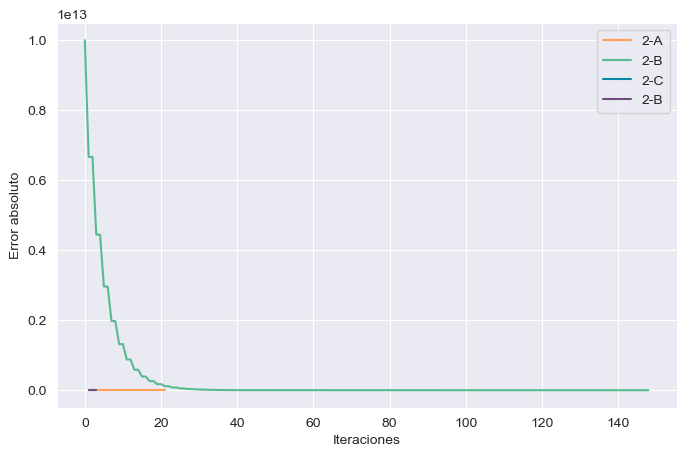

In [15]:
plt.figure(figsize=(8,5))

sns.lineplot(fix_point_2a.summary['Error ABS'], color='#FFA056', label='2-A')
sns.lineplot(new_rap_2b.summary['Error ABS'], color='#58bb90', label='2-B')
sns.lineplot(fix_point_2c.summary['Error ABS'], color='#0B84A5', label='2-C')
sns.lineplot(fix_point_2c.summary['Error ABS'], color='#6F4E7C', label='2-B')

plt.ylabel('Error absoluto')
plt.xlabel('Iteraciones')
plt.legend()
plt.show

## Punto 3

Hallar los puntos críticos de forma numérica para las siguientes funciones

a) $f(x) = e^{−x} - x$

b) $f(x) = ln(x) - 5x^{2}$


<h4>Solución</h4>

a) $f(x) = e^{−x} - x$

\begin{array}{ll}
\frac{df(x)}{dx} = -1e^{-x} - 1 & \text{Derivando } f(x)\\
-1e^{-x} - 1 = 0 & \text{Igualando a } 0\\
-1e^{-x} = 1 & \text{Sumando 1 a ambos lados}\\
e^{-x} = -1 & \text{Dividiendo entre 1 a ambos lados}
\end{array}

$\quad$

b) $f(x) = ln(x) - 5x^{2}$

\begin{array}{ll}
\frac{df(x)}{dx} = \frac{1}{x} - 10x & \text{Derivando } f(x)\\
\frac{1}{x} - 10x = 0 & \text{Igualando la derivada a 0}
\end{array}

## Punto 4

Construir un programa que calcule los betas de MCO, el error estándar y el $R^2$.

a) Utilizar el programa para estimar los parámetros de los siguientes modelos con una base de datos dada.

b) Comparar los resultados con los obtenidos por un módulo en Python


In [ ]:
class MCO:

  def __init__(self, dataframe, predict_col, target_col):
    '''
    Create an instance of the MCO class
    '''

    self.dataframe = dataframe
    self.predict_col = predict_col
    self.target_col = target_col





## Punto 5

Compute un equilibrio de Cournot para un duopolio. El problema es encontrar los dos resultados de producción para dos firmas, de tal manera que ninguna empresa encontraría ventajas en desviarse (unilateralmente) de esa producción. El problema que enfrenta cada empresa es que aumentar la producción puede aumentar los ingresos (la empresa vende más) pero también puede disminuir los precios (debido a una mayor disponibilidad).

Por tanto, se debe buscar cantidades de producción que maximicen el beneficio neto. Las funciones de costos que tienen las dos firmas son:

$$C_i(q_i) = \frac{1}{2} \cdot c_i \cdot q_i \quad i = 1, 2$$

Suponga la función de demanda inversa (para todo el mercado):

$$P(q) = q^{−1/γ}$$

Esta función produce el precio de mercado, dada la oferta conjunta $q = q1 + q2$. El beneficio ($\pi_i(q1, q2)$) de la firma i es ganancia menos costos. Para encontrar el equilibrio de Cournot, se debe hacer cumplir la condición de optimización de beneficio para la empresa 1, en función de su producción q1, y de beneficio para la empresa 2, como una función de q2. La condición de estacionariedad produce el siguiente conjunto de dos ecuaciones no lineales:

$$f_i(q) = (q1 + q2)^{−1/γ} - (1/γ)(q1 + q2)^{\frac{-1}{γ} -1} \cdot q_i - c_i \cdot q_i = 0 \quad i = 1, 2.$$

También se necesita la matriz jacobiana de $f_i(q)$. Asuma $γ = 0.6$, $c1 = 0.6$ y $c2 = 0.8$. Para resolver el problema por el método de Newton, se necesita una función que calcule tanto la función misma como el jacobiano.

a) Construya la matriz Jacobiana.

b) Construya la función que calcula la función y el Jacobiano

c) Halle la solución del problema de optimización (raíz de la derivada de f) con ayuda de un método numérico visto en clase.

In [6]:
bis = Bisection()
bis.set_parameters([-10,10], 10e-3000, lambda x:x+1)
bis.fit()

In [7]:
bis.summary

Iter,Root,Error ABS,Error Relative
i64,f64,f64,f64
1,0.0,10.0,100.0
2,-5.0,5.0,100.0
3,-2.5,2.5,100.0
4,-1.25,1.25,100.0
5,-0.625,0.625,50.0
…,…,…,…
12,-1.000977,0.005,0.5
13,-0.998535,0.002,0.2
14,-0.999756,0.001,0.1


In [ ]:
def absolute(approximate, real):
    '''
    Compute the relative error associated to
    an approximated error.
    '''

    error = abs(approximate - real)

    return round(error, 3)

def relative(approximate, real):
    '''
    Compute the relative error associated to
    an approximated error.
    '''

    error = absolute(approximate, real) / abs(real) * 100

    return round(error, 3)

